In [69]:
#NAMIT LODH(Intern in sparks Foundation)

#Problem Statement
#predict the optimum number of clusters and represent it visually

In [70]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [71]:
data=pd.read_csv("Iris.csv")

In [72]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [74]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [75]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [76]:
data.shape

(150, 6)

In [77]:
data.isnull().sum()
#no null data

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [78]:
data.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [79]:
data.duplicated().sum()
#no duplicate data

0

In [80]:
data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [81]:
data=data.drop(columns="Id")

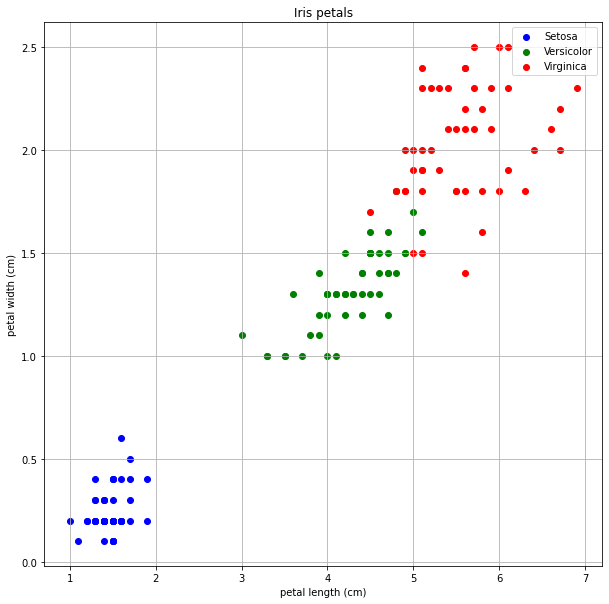

In [82]:
setosa = data[data.Species == "Iris-setosa"]
versicolor = data[data.Species=='Iris-versicolor']
virginica = data[data.Species=='Iris-virginica']

fig, ax = plt.subplots()
fig.set_size_inches(10,10) 

# lables and scatter points
ax.scatter(setosa['PetalLengthCm'], setosa['PetalWidthCm'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['PetalLengthCm'], versicolor['PetalWidthCm'], label="Versicolor", facecolor="green")
ax.scatter(virginica['PetalLengthCm'], virginica['PetalWidthCm'], label="Virginica", facecolor="red")


ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

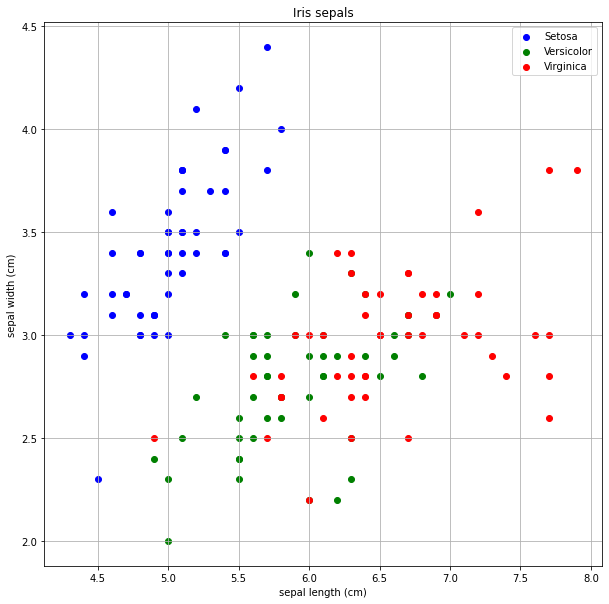

In [83]:
setosa = data[data.Species == "Iris-setosa"]
versicolor = data[data.Species=='Iris-versicolor']
virginica = data[data.Species=='Iris-virginica']

fig, ax = plt.subplots()
fig.set_size_inches(10,10) 

# lables and scatter points
ax.scatter(setosa['SepalLengthCm'], setosa['SepalWidthCm'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['SepalLengthCm'], versicolor['SepalWidthCm'], label="Versicolor", facecolor="green")
ax.scatter(virginica['SepalLengthCm'], virginica['SepalWidthCm'], label="Virginica", facecolor="red")


ax.set_xlabel("sepal length (cm)")
ax.set_ylabel("sepal width (cm)")
ax.grid()
ax.set_title("Iris sepals")
ax.legend()

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


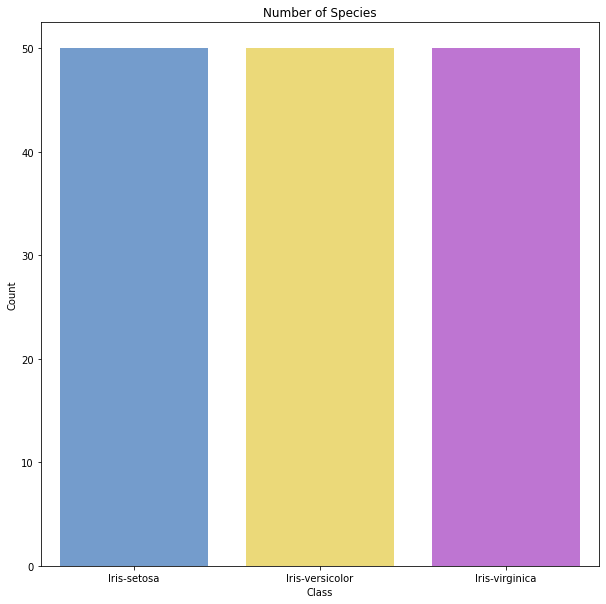

In [84]:
count = data['Species'].value_counts()
plt.figure(figsize=(10,10))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=10)
plt.xlabel('Class', fontsize=10)
plt.title('Number of Species')
plt.show()

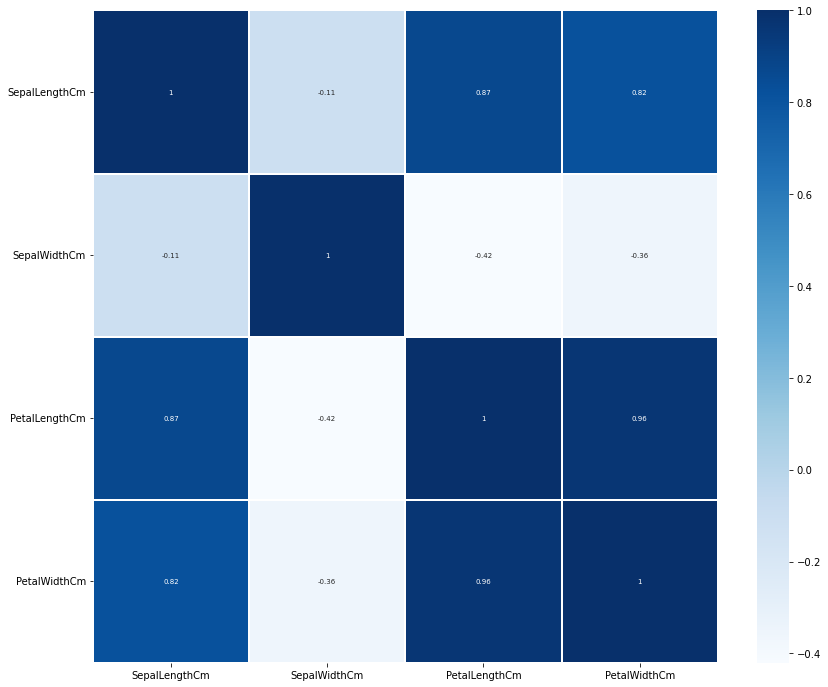

In [85]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=.1,cmap="Blues", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

In [86]:
from sklearn.model_selection import train_test_split

x=data.iloc[:,:4]
y=data.iloc[:,4]

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [87]:
X_train.shape

(105, 4)

In [88]:
X_test.shape

(45, 4)

In [89]:
y_test.shape

(45,)

In [90]:
y_train.shape

(105,)

In [91]:
from sklearn.linear_model import LogisticRegression

l= LogisticRegression()
l.fit(X_train,y_train)

LogisticRegression()

In [92]:
training_prediction = l.predict(X_train)
training_prediction

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-vir

In [93]:
test_prediction=l.predict(X_test)
test_prediction

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [94]:
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, test_prediction))

Accuracy score 0.978


In [95]:
from sklearn import metrics

print("Precision, Recall, Confusion matrix, in training\n")

# Precision Recall scores
print(metrics.classification_report(y_train, training_prediction, digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y_train, training_prediction))

Precision, Recall, Confusion matrix, in training

                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        34
Iris-versicolor      1.000     0.938     0.968        32
 Iris-virginica      0.951     1.000     0.975        39

       accuracy                          0.981       105
      macro avg      0.984     0.979     0.981       105
   weighted avg      0.982     0.981     0.981       105

[[34  0  0]
 [ 0 30  2]
 [ 0  0 39]]


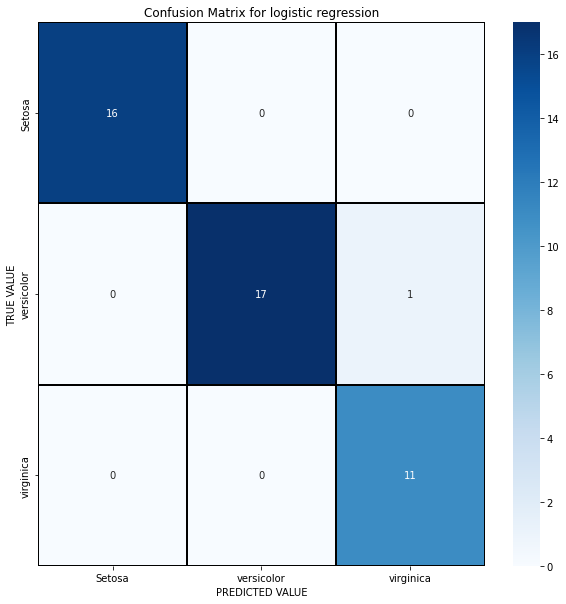

In [96]:
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(y_test, test_prediction)

x_axis_labels = ["Setosa", "versicolor","virginica"]
y_axis_labels = ["Setosa", "versicolor","virginica"]

f,ax=plt.subplots(figsize =(10,10))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black",  fmt = ".0f", ax=ax,cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUE")
plt.ylabel("TRUE VALUE")
plt.title('Confusion Matrix for logistic regression')
plt.show()